<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast_%E6%89%93%E7%90%83%E9%80%9F%E5%BA%A6TOP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt-get -y fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 103.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.5 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0a72c0a379490093f4a0ab819256bb3c465aa5b2642359d8acf429debbb882c9
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/u

In [2]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [3]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [4]:
#各ＣＳＶファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラー発生: {e}")


sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。


In [5]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined #結合したファイルをｄｆに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数 :{len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-07-31,94.9,-1.51,5.49,"Iglesias, Raisel",666158,628452,field_out,hit_into_play,...,1.0,1.03,0.80,-0.80,33.4,14.625621,5.139658,26.105401,39.877731,29.346793
1,CH,2025-07-31,88.6,-1.83,5.27,"Iglesias, Raisel",666158,628452,NaN,foul,...,1.0,2.09,1.07,-1.07,27.5,24.633351,-10.604571,30.797530,36.951177,47.111399
2,FF,2025-07-31,96.4,-2.57,4.90,"Iglesias, Raisel",668715,628452,strikeout,swinging_strike,...,1.0,1.21,1.09,1.09,22.3,-10.379971,49.317661,30.875973,29.386007,10.276153
3,FF,2025-07-31,95.7,-1.49,5.55,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.14,0.67,0.67,35.6,NaN,NaN,NaN,NaN,NaN
4,FF,2025-07-31,93.0,-2.06,5.11,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.47,0.92,0.92,23.6,NaN,NaN,NaN,NaN,NaN


結合後の行数 :742080


In [6]:
# --- 1.データのクリーニング ---
#打球速度(launch_speed)がないデータを除外してコピー
df_batted=df.dropna(subset=["launch_speed"]).copy()

# ---2. 打者(batter)ごとの集計 ---
# batterカラムでグループ化し、平均・最大・個数を計算
batter_stats=df_batted.groupby("batter").agg(
    Avg_EV=("launch_speed","mean"),
    Max_EV=("launch_speed","max"),
    Batted_Balls=("launch_speed", "count")
).reset_index()

# ---3.信頼性のフィルタリング ---
#打球数５０本以上の打者に絞り込む
MIN_BATTED_BALLS = 50
batter_stats_filtered=batter_stats[batter_stats["Batted_Balls"] >= MIN_BATTED_BALLS].copy()

# ---4.ランキングの作成 ---
#平均打球速度(Avg_EV)の降順でTOP10を抽出
top_10_ev_batters = batter_stats_filtered.sort_values(by="Avg_EV",ascending=False).head(10)

# ---5.打者名のマージ(des カラムからフルネームを抽出)
def get_full_name(text):
  if pd.isna(text): return "Unknown"
  #空白で分割して、最初の2単語（名 と 姓）を結合する
  words=text.split(" " )
  if len(words) >= 2:
    #Shohei Ohtaniのように2単語をスペースでつなぐ
    #カンマなどが含まれる場合を考慮してクリーンアップ
    first_name=words[0]
    last_name=words[1].replace("," , "").replace(" :", "")
    return f"{first_name} {last_name}"

name_map=df[["batter", "des"]].copy()
name_map["batter_name"]=name_map["des"].apply(get_full_name) #ここで新しい関数を呼ぶ
name_map=name_map.drop_duplicates(subset="batter")

top_10_ev_batters=pd.merge(top_10_ev_batters, name_map[["batter", "batter_name"]],on="batter",how="left")


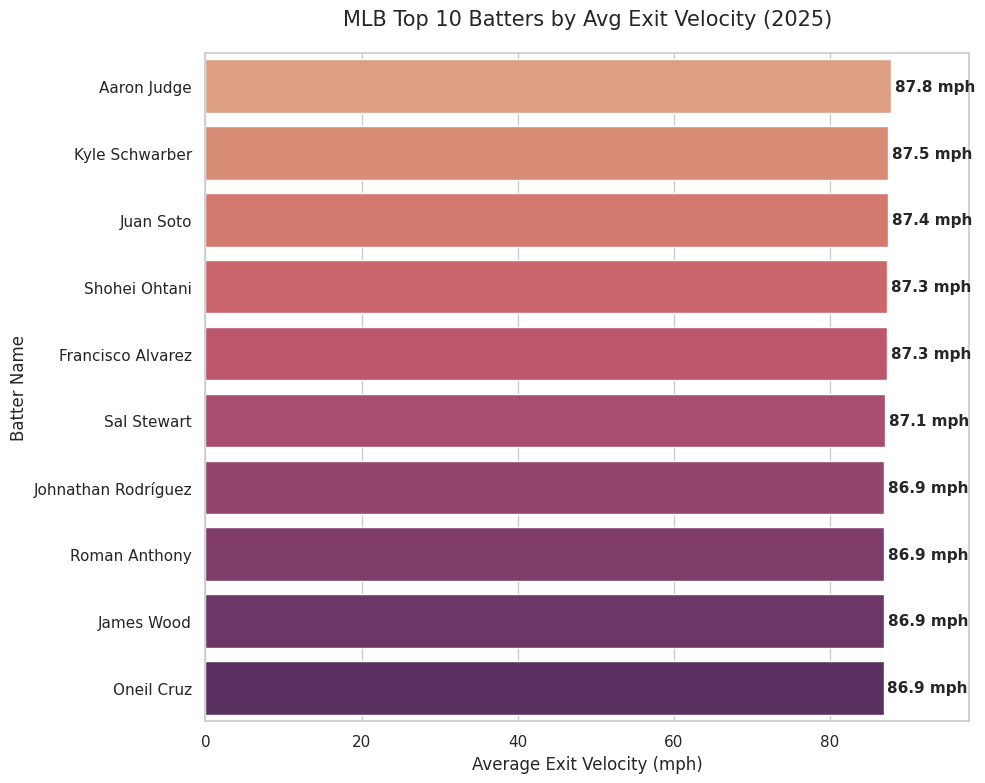

In [13]:
# --- 6.可視化 ---
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

#1.確実にデータが10件ある状態にする
plot_data=top_10_ev_batters.sort_values("Avg_EV",ascending=False).head(10)

#2.棒グラフの作成
plot=sns.barplot(
    data=plot_data,
    x="Avg_EV",
    y="batter_name",
    hue="batter_name", # FutureWarningを回避するためhueを追加
    palette="flare",
    legend=False # hueを追加したので、不要な凡例を非表示にする
)

#3.グラフの先端に数値を表示する処理
for i, bar in enumerate(plot.patches):
  width=bar.get_width() # 棒の長さ（速度）を取得
  if width > 0:
      plot.text(
          width + 0.5,                   #表示するX座標（棒の先端から少し右）
          bar.get_y() + bar.get_height()/2, #表示するY座標（棒の中央）
          f"{width:,.1f} mph" ,          #表示するテキスト（小数点1桁 ＋ 単位）
          va="center",
          fontsize=11,                   #フォントサイズ
          fontweight="bold"              #太字にして目立たせる
  )
#4.グラフの装飾
plt.title("MLB Top 10 Batters by Avg Exit Velocity (2025)", fontsize=15, pad=20)
plt.xlabel("Average Exit Velocity (mph)", fontsize=12) #軸ラベルにも単位を明記
plt.ylabel("Batter Name", fontsize=12)

#横軸の範囲をデータの最大値より少し広げる（ラベルが隠れないように）
max_val=plot_data["Avg_EV"].max()
plt.xlim(0, max_val + 10)#0から表示して差を強調
plt.tight_layout()
plt.show()